Consiga exactamente esta visualización utilizando los datos:
<br />
<img src="img.png" width="375" height="250" />

In [30]:
dataset_path = './dataset'
business_data = pd.read_csv(dataset_path + '/business.csv')
business_attributes = business_data["attributes"]
att = business_attributes[0]
business_attributes = business_attributes.apply(lambda attribute: json.dumps(attribute))

In [31]:
business_attributes = business_data["attributes"]
att = business_attributes[1]
business_attributes = business_attributes.apply(lambda attribute: json.dumps(attribute))
group = att


def adhoc_json_cleaning(x):
  if not x: return None
  if x != x: return None
  if isinstance(x, float): return None
  att = x
  att_cl = re.sub("\\\"[^{\']*\\\"", lambda x: x.group(0).replace('\\\'', ''), att)
  att_cl = re.sub(r'(?<=\")([^\{,][^\\", ]+)', "repl", att_cl)
  att_cl = re.sub(r'(?=u\')([^:])([^\{,][^\\",:]+)', "\"repl\"", att_cl)
  att_cl = att_cl.replace("\\\"", "\"")
  att_cl = att_cl.replace("\\\'", "\"")
  att_cl = att_cl.replace("\'", "\"")
  att_cl = att_cl.replace("\"{", "{")
  att_cl = att_cl.replace("}\"", "}")
  att_cl = att_cl.replace("None", "\"None\"")
  att_cl = att_cl.replace("False", "\"False\"")
  att_cl = att_cl.replace("\"\"False\"\"", "\"False\"")
  att_cl = att_cl.replace("True", "\"True\"")
  att_cl = att_cl.replace("\"\"True\"\"", "\"True\"")
  att_cl = att_cl.replace("\"\"None\"\"", "\"None\"")
  json_att = json.loads(att_cl)
  if isinstance(json_att, float): return None
  return json_att.get('RestaurantsPriceRange2')


y = business_attributes.map(lambda att: adhoc_json_cleaning(att))
y.dropna(inplace=True)
y = y[y != 'None']

<BarContainer object of 4 artists>

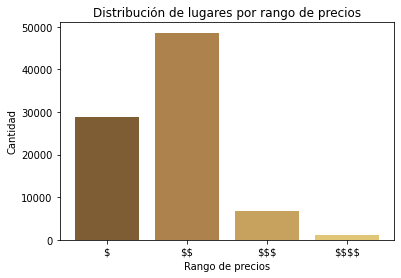

In [32]:
colors = ["#7f5d34", "#ae824c", "#c7a25f", "#e1c677"]
x_labels = ['\$', '\$\$', '\$\$\$', '\$\$\$\$']

labels, counts = np.unique(y, return_counts=True)

fig, ax = plt.subplots()
ax.set_ylabel('Cantidad')
ax.set_xlabel('Rango de precios')
ax.set_title('Distribución de lugares por rango de precios')
ax.set_adjustable("datalim")

plt.bar(x_labels, counts, color=colors)